### MiniProyecto6
##### Andrei Portales 19
##### Hugo Román 19199


In [1]:
import random
import matplotlib.pyplot as plt

### Ejercicio 1

1. Cree un programa en su lenguaje de programación favorito que use el método de Monte Carlo para
determinar la probabilidad de cara o escudo en una moneda justa
2. Grafique usando una gráfica de línea las iteraciones (eje x) y la probabilidad de de las mismas (eje y).


0.49


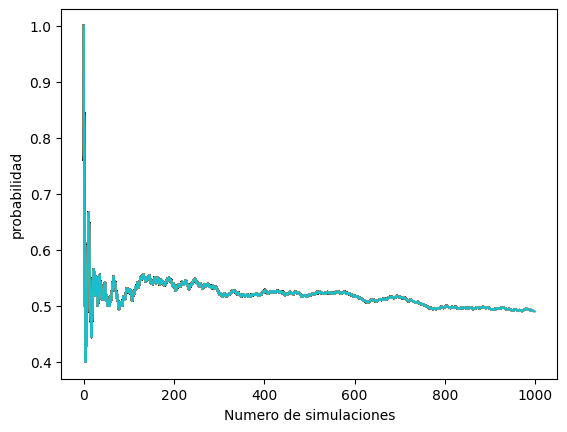

In [17]:
from matplotlib.lines import lineStyles


def lanzamiento():
    # Generar un numero entre 0 y 1
    x = random.uniform(0, 1)
    return random.randint(0,1)
    
probabilidad = []
 
#simulando 1000 experimentos
def MonteCarloSimulation(iteraciones):
    resultados = 0
    for i in range(iteraciones):
        flip = lanzamiento() #llamar a la función de lanzamiento
        resultados += flip #contador
        probI = resultados/(i+1) #obtener el valor de la var resultados
        probabilidad.append(probI) #append al array probabilidad
        
        #creacion de la grafica
        #plt.axhline(y=0.5,color = 'b', linestyle = '-')
        plt.xlabel("Numero de simulaciones")
        plt.ylabel("probabilidad")
        plt.plot(probabilidad)
    
    return resultados/iteraciones

valor = MonteCarloSimulation(1000)
print(valor)
        
  

### Ejercicio 2

Consideren un juego imaginario en el que el jugador tiene que escoger una token numerado de 1 a 100 de una caja.

Las reglas son las siguientes:
1. Los tokens están numerados de 1 a 100 en la caja
2. Los jugadores pueden apostar por un número par o impar que saldrá al tomar el token de la caja
3. En este juego, 10 y 11 son números especiales. Si se apuesta por un número par, entonces 10 será considerado un número impar; si se apuesta por un número impar, entonces 11 será considerado como un número par.
4. Si se apuesta por un número par y se obtiene 10 entonces se pierde.
5. Si se apuesta por un número impar y se obtiene 11 entonces se pierde

In [4]:
def simulate_game(dinero_total, dinero_apuesta, juegos_totales):
    money = dinero_total
    apuestas = 0

    for game in range(juegos_totales):
        apuesta = random.randint(0, 1)
        apuestas += 1
        token = random.randint(1, 100)

        ispar = token % 2 == 0

        if apuesta == 0 and ispar:
            if token == 10:
                break
            money += dinero_apuesta
        else:
            money -= dinero_apuesta

        if apuesta == 1 and not ispar:
            if token == 11:
                break
            money += dinero_apuesta
        else:
            money -= dinero_apuesta

        if money <= 0:
            break
    return money, apuestas

In [5]:
a = [simulate_game(100, 1, 50) for i in range(10)]
b = [simulate_game(100, 1, 50) for i in range(1000)]
c = [simulate_game(100, 1, 10000) for i in range(10)]

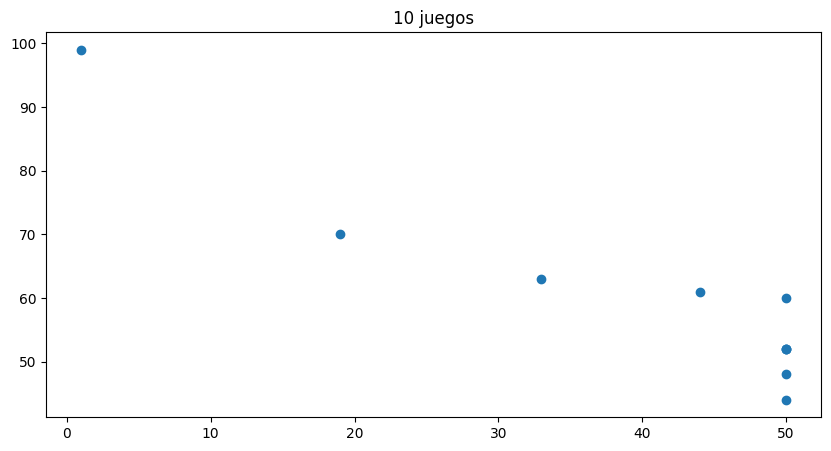

In [6]:
plt.figure(figsize=(10, 5))
plt.title("10 juegos")
ejex = [i[1] for i in a]
ejey = [i[0] for i in a]
plt.scatter(ejex, ejey)